<a href="https://colab.research.google.com/github/kunalmane07-tech/OIBSIP_domain_01/blob/main/Houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset
# Upload the house_prices.csv file in Colab first
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("house_prices.csv")
df.head()


Saving house_prices.csv to house_prices.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

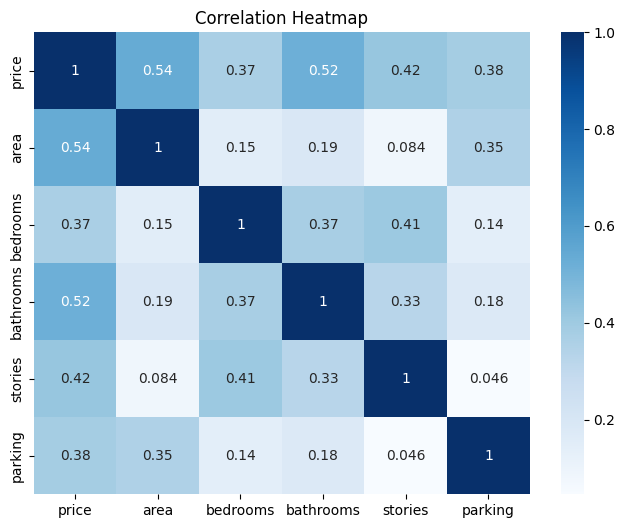

In [ ]:
# Step 3: Explore the Dataset

print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualizing correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Step 4: Feature Selection and Preprocessing

X = df.drop("price", axis=1)
y = df["price"]

# Convert binary categorical columns to 0 and 1
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    X[col] = X[col].apply(lambda x: 1 if x == 'yes' else 0)

# Perform one-hot encoding for 'furnishingstatus'
X = pd.get_dummies(X, columns=['furnishingstatus'], drop_first=True)

In [ ]:
# Step 5: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Step 6: Train Linear Regression Model


# Re-execute preprocessing steps to ensure X_train is numerical
X_reprocessed = df.drop("price", axis=1)   # input features
y_reprocessed = df["price"]                # target variable

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    X_reprocessed[col] = X_reprocessed[col].apply(lambda x: 1 if x == 'yes' else 0)

X_reprocessed = pd.get_dummies(X_reprocessed, columns=['furnishingstatus'], drop_first=True)

# Re-execute train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_reprocessed, y_reprocessed, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model Training Completed!")

Model Training Completed!


In [ ]:
# Step 7: Model Evaluation

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

# View coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
coef_df


Mean Squared Error: 1754318687330.6633
Root Mean Squared Error: 1324506.9600914384
R² Score: 0.6529242642153185


,Feature,Coefficient
0,area,2.359688e+02
1,bedrooms,7.677870e+04
2,bathrooms,1.094445e+06
3,stories,4.074766e+05
4,mainroad,3.679199e+05
5,guestroom,2.316100e+05
6,basement,3.902512e+05
7,hotwaterheating,6.846499e+05
8,airconditioning,7.914267e+05
9,parking,2.248419e+05


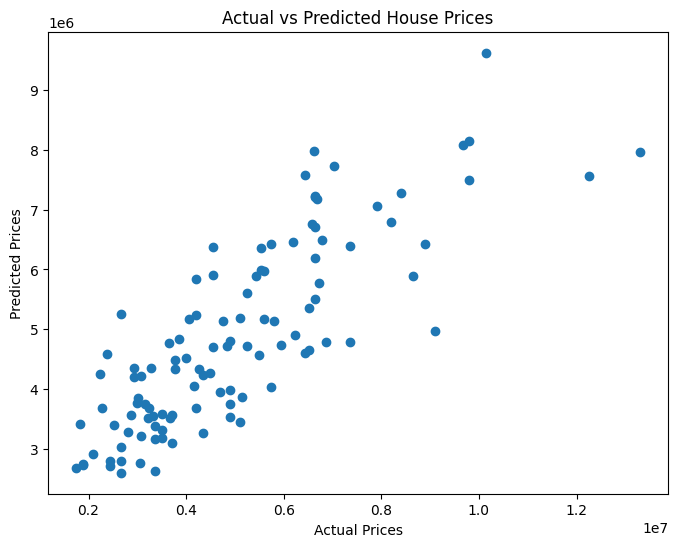

In [ ]:
# Step 8: Visualization — Actual vs Predicted Prices

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
